In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'

import sqlite3
import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.path
from pylab import *
import seaborn as sns

date_columns = ['deal_date', 'return_date', 'expiration_date']

conn = sqlite3.connect("../../data/loancwm.db")
deals = pd.read_sql_query("select * from deals;", conn, parse_dates=date_columns)
conn.close()


In [4]:
deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534 entries, 0 to 4533
Data columns (total 18 columns):
dea_date               4534 non-null int64
deal_date              4534 non-null datetime64[ns]
period                 4534 non-null int64
credit_amount          4534 non-null float64
return_amount          4534 non-null float64
rate                   4534 non-null float64
outstanding            4534 non-null float64
return_date            4534 non-null datetime64[ns]
exp_date               4534 non-null int64
expiration_date        4534 non-null datetime64[ns]
delinq                 4534 non-null int64
business_level         4534 non-null int64
debt                   4534 non-null float64
credit_amount_total    4534 non-null float64
model                  4534 non-null object
wmid                   4534 non-null object
loan_count             4534 non-null int64
loan_count_total       4534 non-null int64
dtypes: datetime64[ns](3), float64(6), int64(7), object(2)
memory usage: 637.7

In [5]:
deals.head()

,dea_date,deal_date,period,credit_amount,return_amount,rate,outstanding,return_date,exp_date,expiration_date,delinq,business_level,debt,credit_amount_total,model,wmid,loan_count,loan_count_total
0,1422008463,2015-01-23 11:21:03,30,26.22,26.22,0.75,0.0,2015-02-15 21:36:22,1424600463,2015-02-22 11:21:03,-7,140,0.0,0.0,v0,189175698961,0,3
1,1422010696,2015-01-23 11:58:16,30,26.95,26.95,1.08,0.0,2015-01-28 16:05:53,1424602696,2015-02-22 11:58:16,-25,88,0.0,0.0,v0,379750174437,0,1
2,1422012365,2015-01-23 12:26:05,30,27.24,27.24,1.11,0.0,2015-03-01 17:22:42,1424604365,2015-02-22 12:26:05,7,55,0.0,0.0,v0,906193402426,1,2
3,1422118026,2015-01-24 17:47:06,31,26.25,26.25,0.59,0.0,2015-02-23 20:50:41,1424796426,2015-02-24 17:47:06,-1,171,0.0,0.0,v0,282643277973,0,6
4,1422183203,2015-01-25 11:53:23,60,30.00,30.00,1.22,0.0,2015-03-26 16:05:20,1427367203,2015-03-26 11:53:23,0,90,0.0,0.0,v0,264875037614,1,22


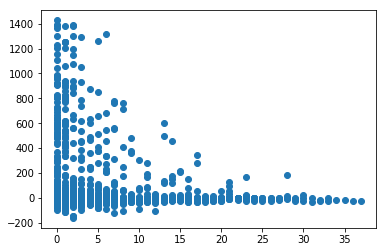

In [6]:
scatter(deals['loan_count'], deals['delinq'])

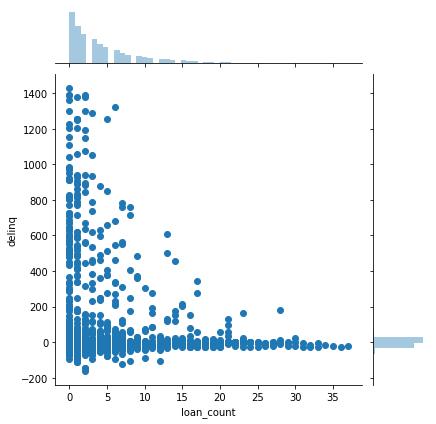

In [7]:
sns.jointplot(x='loan_count', y='delinq', data=deals, kind='scatter')

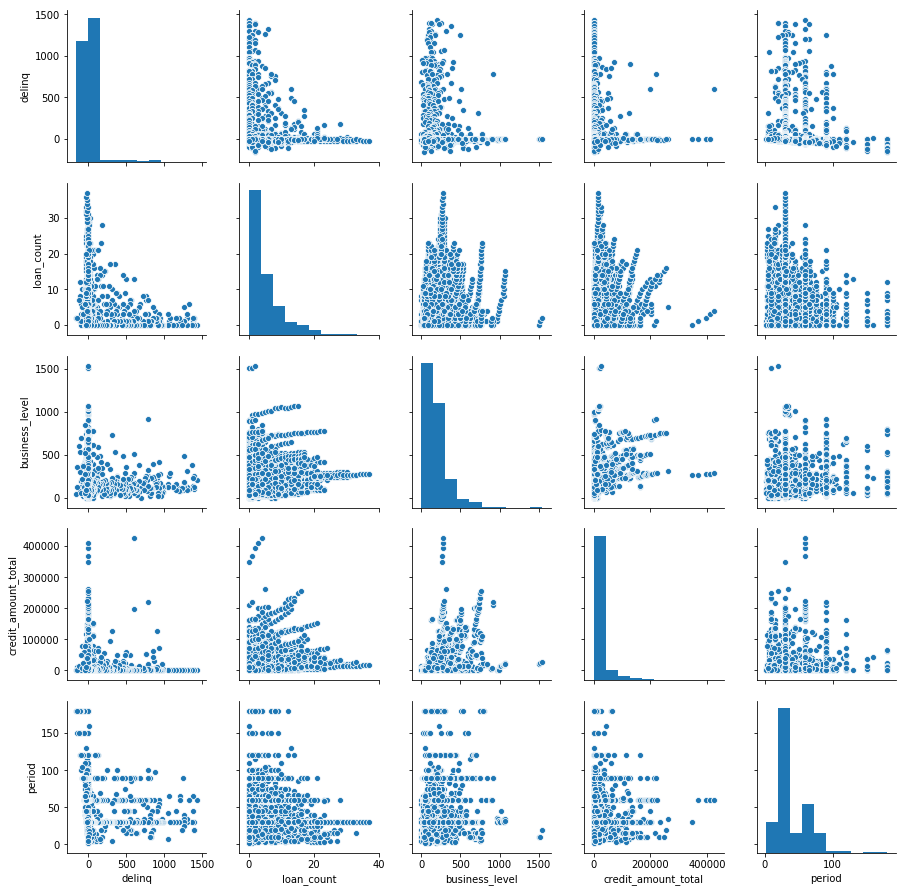

In [8]:
sns.pairplot(deals[['delinq', 'loan_count', 'business_level', 'credit_amount_total', 'period']])

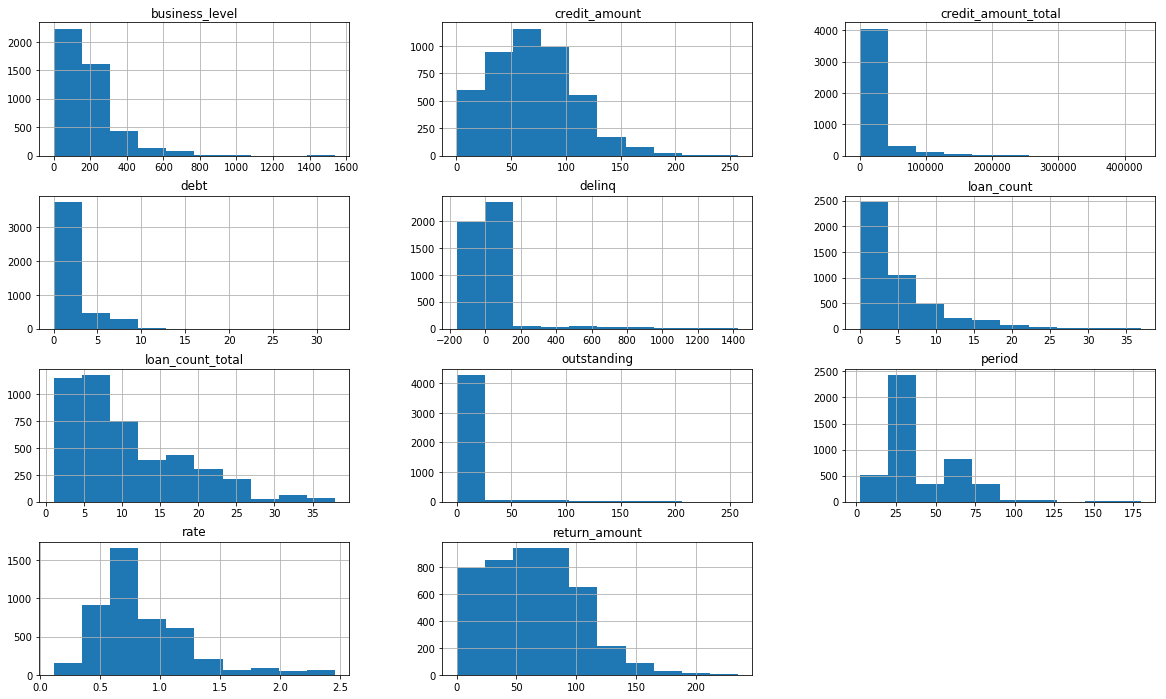

In [9]:
features = list(set(deals.columns) - set(['dea_date', 'exp_date']))
deals[features].hist(figsize=(20,12));

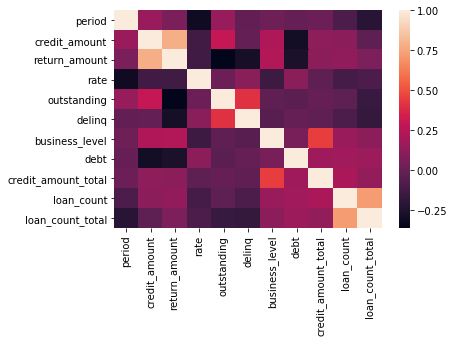

In [10]:
%config InlineBackend.figure_format = 'png'
corr_matrix = deals.drop(date_columns + ['dea_date', 'exp_date'], axis=1).corr()
sns.heatmap(corr_matrix);